In [3]:
import Rasterdata
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = Rasterdata.mergingdata()


/Users/simrandeepsingh/Rasterdata/__init__.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['ECE'][i] = a
/Users/simrandeepsingh/Rasterdata/__init__.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['DES'][i] = b
/Users/simrandeepsingh/Rasterdata/__init__.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['SND'][i] = c


In [5]:
df.head()
#sampled data collected australian water utility.
#remove depth of soil, ph.
#dont mention lga, pipe_id

,#_failures,Above_Ground,Available Water Capacity of soil,Bulk Density,Clay content of soil,Corrosive,Depth of Regolith(m) Estimate Value,Depth of Soil_1,Depth of Soil_2,Depth of Soil_3,...,meanGL,pH CaCl2 of soil,pipe_size,pipe_type,pipe_id,rate_dis_min_max,variance,ECE,DES,SND
0,0,False,13.35367,1.44454,35.34123,False,2.45581,0.91864,0.85693,0.98035,...,102.610163,4.38930,450,CICL,969731,1.803923,42.486657,1.688273,0.819286,35.364124
1,0,False,13.55364,1.39171,38.03822,False,1.91016,0.93327,0.85895,1.00760,...,114.059667,4.42773,300,CICL,834317,1.773362,0.001578,2.065556,0.826187,32.016441
2,0,False,14.03701,1.42618,35.92850,True,6.58317,1.05970,1.01487,1.10454,...,82.061933,4.85542,500,DICL,2751211,2.432449,0.020876,2.582660,1.014872,42.694370
3,0,False,13.58521,1.43660,31.51254,False,6.56852,1.03126,0.97197,1.09056,...,21.163500,4.86466,450,DICL,3515016,0.435364,0.006989,2.486584,1.037101,29.256130
4,0,False,14.55651,1.42271,34.24453,True,7.30174,1.12071,1.06157,1.17986,...,61.728400,5.01626,250,DICL,3128460,1.196072,0.000000,3.074979,1.061569,42.874249


In [6]:
del df['pipe_id']
del df['Depth of Soil_1']
del df['Depth of Soil_2']
del df['Depth of Soil_3']
df = df.dropna()

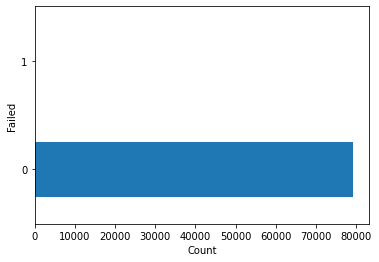

In [7]:
df['Failed'].value_counts().plot(kind = "barh")
plt.xlabel("Count")
plt.ylabel("Failed")
plt.show()

In [8]:
df.lga.unique()

array(['Hornsby', 'Ku-Ring-Gai', 'Blacktown', 'Parramatta', 'Penrith',
       'Sydney', 'Wollongong', 'Randwick', 'Pittwater', 'Woollahra',
       'Sutherland', 'Shellharbour', 'Camden', 'Bankstown',
       'North Sydney', 'Wollondilly', 'Campbelltown', 'Botany Bay',
       'The Hills Shire', 'Unknown', 'Holroyd', 'Marrickville',
       'Fairfield', 'Liverpool', 'Ryde', 'Canterbury', 'Ashfield',
       'Willoughby', 'Leichhardt', 'Kiama', 'Hawkesbury', 'Hurstville',
       'Auburn', 'Waverley', 'Manly', 'Rockdale', 'Canada Bay', 'Burwood',
       'Blue Mountains', 'Lane Cove', 'Warringah', 'Mosman',
       'Strathfield', 'Hunters Hill', 'Wingecarribee', 'Kogarah'],
      dtype=object)

In [9]:
title_mapping = {"Hornsby": 0, "Ku-Ring-Gai": 1, "Blacktown": 2,"Parramatta":3, "Penrith":4, "Sydney":5, "Wollongong":6,
                "Randwick":7, "Pittwater":8, "Woollahra":9,"Sutherland":10,"Shellharbour":11,"Camden":12,"Bankstown":13
                ,"North Sydney":14,"Wollondilly":15,"Campbelltown":16,"Botany Bay":17,"The Hills Shire":18,"Unknown":19,
                "Holroyd":20,"Marrickville":21,"Fairfield":22,"Liverpool":23,"Ryde":24,"Canterbury":25,"Ashfield":26,
                "Willoughby":27,"Leichhardt":28,"Kiama":29,"Hawkesbury":30,"Hurstville":31,"Auburn":32,"Waverley":33,
                "Manly":34,"Rockdale":35,"Canada Bay":36,"Burwood":37,"Blue Mountains":38,"Lane Cove":39,"Warringah":40
                ,"Mosman":41,"Strathfield":42,"Hunters Hill":43,"Wingecarribee":44,"Kogarah":45}

df['lga'] = df['lga'].map(title_mapping) 

In [10]:
df.pipe_type.unique()


array(['CICL', 'DICL', 'PE', 'SCL', 'uPVC', 'SCL IBL', 'mPVC', 'oPVC',
       'Unknown', 'GRP', 'RC', 'HDPE', 'FL BAR', 'SS', 'Primus Liner',
       'AC', 'MSCL', 'VC', 'DICLSC'], dtype=object)

In [11]:
pipe_mapping = {"CICL": 0, "DICL": 1, "PE": 2,"SCL":3, "uPVC":4,"SCL IBL'":3, "mPVC":4, "oPVC":5, "Unknown":6,
                "GRP":7, "RC":8, "HDPE":9,"FL BAR":10,"SS":11,"Primus Liner":12,"AC":13
                ,"MSCL":14,"VC":15,"DICLSC":16}

df['pipe_type'] = df['pipe_type'].map(title_mapping) 


In [13]:
del df['pipe_type']

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 79536 entries, 0 to 79639
Data columns (total 69 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   #_failures                                  79536 non-null  int64  
 1   Above_Ground                                79536 non-null  bool   
 2   Available Water Capacity of soil            79536 non-null  float64
 3   Bulk Density                                79536 non-null  float64
 4   Clay content of soil                        79536 non-null  float64
 5   Corrosive                                   79536 non-null  bool   
 6   Depth of Regolith(m) Estimate Value         79536 non-null  float64
 7   Effective Cation Exchange Capacity of soil  79536 non-null  float64
 8   Encased_in_Pipe                             79536 non-null  bool   
 9   FWY_CW                                      79536 non-null  bool   
 10  FWY_RR    

In [15]:
import numpy as np
#Create independent and Dependent Features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Failed"]]
# Store the variable we are predicting 
target = "Failed"
# Define a random state 
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)


(79536, 68)
(79536,)


In [16]:
failedpipe = df[df['Failed']==1]

normal = df[df['Failed']==0]


In [17]:
print(failedpipe.shape,normal.shape)


(228, 69) (79308, 69)


In [18]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1)


In [20]:
from tpot import TPOTClassifier 


In [21]:
tpot_obj = TPOTClassifier(generations=10, population_size=20, cv=5, scoring = 'neg_log_loss',
                                    random_state=42, verbosity=2, template='Selector-Transformer-Classifier')


In [22]:
tpot_obj.fit(X_train, Y_train)


Version 0.11.6.post1 of tpot is outdated. Version 0.11.7 was released Wednesday January 06, 2021.



Generation 1 - Current best internal CV score: -0.015823557524476

Generation 2 - Current best internal CV score: -0.015823557524476

Generation 3 - Current best internal CV score: -0.01556503315826921

Generation 4 - Current best internal CV score: -0.01556503315826921

Generation 5 - Current best internal CV score: -0.01556503315826921

Generation 6 - Current best internal CV score: -0.01556503315826921

Generation 7 - Current best internal CV score: -0.01542436403477152

Generation 8 - Current best internal CV score: -0.01542436403477152

Generation 9 - Current best internal CV score: -0.01542436403477152

Generation 10 - Current best internal CV score: -0.01542436403477152

Best pipeline: XGBClassifier(StandardScaler(VarianceThreshold(input_matrix, threshold=0.0001)), learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=100, nthread=1, subsample=0.5)


TPOTClassifier(generations=10, population_size=20, random_state=42,
               scoring='neg_log_loss',
               template='Selector-Transformer-Classifier', verbosity=2)

In [23]:
print(tpot_obj.score(X_test, Y_test))


-0.021613827424744103


In [24]:
# AUC score (prediction and labels)
y_preds = tpot_obj.predict(X_test)



In [28]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test, y_preds, pos_label=1)
auc_roc = auc(fpr, tpr)


In [30]:
print(auc_roc)


0.5


In [31]:
tpot_obj2 = TPOTClassifier(generations=1, population_size=20, cv=5, scoring = 'roc_auc',
                                    random_state=42, verbosity=2, template='Selector-Transformer-Classifier')
tpot_obj2.fit(X_train, Y_train)


Version 0.11.6.post1 of tpot is outdated. Version 0.11.7 was released Wednesday January 06, 2021.



Generation 1 - Current best internal CV score: 0.8689315525059056

Best pipeline: XGBClassifier(StandardScaler(VarianceThreshold(input_matrix, threshold=0.0005)), learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=100, nthread=1, subsample=0.5)


TPOTClassifier(generations=1, population_size=20, random_state=42,
               scoring='roc_auc', template='Selector-Transformer-Classifier',
               verbosity=2)